# Nama: Felix Pratamasan
# Email: felixpratama242@gmail.com

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Download File from Kaggle

In [2]:
#you need to create your own API first in kaggle
#upload kaggle json

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felixpratama","key":"a3f1e3c240e43be127334f9fe19c9a0e"}'}

In [3]:
#create a kaggle folder
!mkdir ~/.kaggle

In [4]:
#copy kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 162MB/s]


#Read Dataset

In [6]:
test_local_zip = '/content/twitter-entity-sentiment-analysis.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/content/dataset')

zip_ref.close()

In [7]:
training_data = pd.read_csv('/content/dataset/twitter_training.csv')

In [8]:
training_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
# add columns name

columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
training_data.columns = columns

In [10]:
training_data.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
#print shape of training data
training_data.shape

(74681, 4)

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
#check missing value
training_data.isnull().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [14]:
#remove missing values
training_data = training_data.dropna()

In [15]:
#check missing values after remove them
training_data.isnull().sum()

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64

# Exploratory Data Analysist

In [16]:
#dropping 'tweet_id', 'entity'
training_data = training_data.drop(['tweet_id', 'entity'], axis=1)

In [17]:
print('shape after remove missing values and drop columns: {}'.format(training_data.shape))

shape after remove missing values and drop columns: (73995, 2)


In [18]:
sentiments = training_data['sentiment']

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64


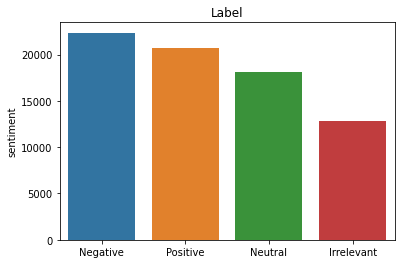

In [19]:
# plot label
x_axis = sentiments.value_counts().index
y_axis = sentiments.value_counts()

print(y_axis)

plt.title('Label')
sns.barplot(x = x_axis, y = y_axis,  data=training_data)
plt.show()

In [20]:
onehot_sentiments = pd.get_dummies(training_data['sentiment'])
training_data_clean = pd.concat([training_data, onehot_sentiments], axis=1)
training_data_clean = training_data_clean.drop(columns='sentiment')
training_data_clean

,tweet_content,Irrelevant,Negative,Neutral,Positive
0,I am coming to the borders and I will kill you...,0,0,0,1
1,im getting on borderlands and i will kill you ...,0,0,0,1
2,im coming on borderlands and i will murder you...,0,0,0,1
3,im getting on borderlands 2 and i will murder ...,0,0,0,1
4,im getting into borderlands and i can murder y...,0,0,0,1
...,...,...,...,...,...
74676,Just realized that the Windows partition of my...,0,0,0,1
74677,Just realized that my Mac window partition is ...,0,0,0,1
74678,Just realized the windows partition of my Mac ...,0,0,0,1
74679,Just realized between the windows partition of...,0,0,0,1


In [21]:
# change column into numpy array
tweet = training_data_clean['tweet_content'].values
label = training_data_clean[['Irrelevant','Negative', 'Neutral', 'Positive']].values

In [22]:
print('twwet type: {}\n{}\n'.format(type(tweet),tweet))
print('label type: {}\n{}'.format(type(label),label))

twwet type: <class 'numpy.ndarray'>
['I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,'
 'im coming on borderlands and i will murder you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'
 'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']

label type: <class 'numpy.ndarray'>
[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


# Data Preprocessing

In [23]:
#split data
train_tweet, test_tweet, train_label, test_label = train_test_split(tweet, label, test_size = 0.2, random_state = 42) 

In [24]:
print('shape train_tweet: {}'.format(train_tweet.shape))
print('shape test_tweet: {}'.format(test_tweet.shape))
print('shape label_train: {}'.format(train_label.shape))
print('shape label_test: {}'.format(test_label.shape))

shape train_tweet: (59196,)
shape test_tweet: (14799,)
shape label_train: (59196, 4)
shape label_test: (14799, 4)


In [25]:
tokenizer = Tokenizer(num_words=10000, oov_token = '<oov>')

In [26]:
tokenizer.fit_on_texts(train_tweet)
tokenizer.fit_on_texts(test_tweet)

In [27]:
#check word index in tokenizer
print(tokenizer.word_index)

{'<oov>': 1, 'the': 2, 'i': 3, 'to': 4, 'and': 5, 'a': 6, 'of': 7, 'is': 8, 'in': 9, 'for': 10, 'this': 11, 'it': 12, 'you': 13, 'on': 14, 'my': 15, 'that': 16, 'com': 17, 'with': 18, 'game': 19, 'so': 20, 'be': 21, 'me': 22, 'have': 23, 'just': 24, 'but': 25, 'not': 26, 'are': 27, 'all': 28, 'at': 29, 'was': 30, 'like': 31, 'out': 32, 'from': 33, '2': 34, 'your': 35, 'pic': 36, 'twitter': 37, 'now': 38, 'get': 39, 'we': 40, 'as': 41, 'they': 42, 'has': 43, 'if': 44, 'one': 45, 'do': 46, 'good': 47, 't': 48, 'about': 49, 'can': 50, 'play': 51, 'no': 52, 'will': 53, 'an': 54, 'new': 55, 'really': 56, 'love': 57, 'when': 58, 'up': 59, "i'm": 60, 'unk': 61, 'what': 62, 'more': 63, 'time': 64, 'by': 65, 'johnson': 66, 'how': 67, 'people': 68, 'some': 69, 'or': 70, 'why': 71, '3': 72, 'see': 73, 'shit': 74, "it's": 75, 'co': 76, 'been': 77, 'best': 78, 'still': 79, 'facebook': 80, '’': 81, 'https': 82, 'got': 83, 'games': 84, 'go': 85, '1': 86, 'great': 87, 'amazon': 88, 'even': 89, 'playin

In [28]:
train_sequences = tokenizer.texts_to_sequences(train_tweet)
test_sequences = tokenizer.texts_to_sequences(test_tweet)

In [29]:
train_pad = pad_sequences(train_sequences,
                          maxlen = 150,
                          padding = 'post',
                          truncating = 'post')

test_pad = pad_sequences(test_sequences,
                          maxlen = 150,
                          padding = 'post',
                          truncating = 'post')

# Buil Model

In [30]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>=0.92 and logs.get('val_accuracy')>=0.92):
#       print("\nAkurasi telah mencapai >= 92%!")
#       self.model.stop_training = True
# callbacks = myCallback()

callbacks = EarlyStopping(monitor = 'val_loss',
                        patience = 3,
                        verbose = 1)


In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 10000, output_dim=16, input_length = 150),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.LSTM(16),
    # tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 16)           160000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 150, 128)         41472     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [61]:
history = model.fit(train_pad, train_label,
                    batch_size = 128,
                    steps_per_epoch = len(tweet) // 128,
                    epochs = 30,
                    validation_data = (test_pad, test_label),
                    verbose = 1,
                    callbacks=[callbacks])

Epoch 1/30
578/578 [==============================] - 26s 36ms/step - loss: 0.9955 - accuracy: 0.5809 - val_loss: 0.8160 - val_accuracy: 0.6882
Epoch 2/30
578/578 [==============================] - 20s 34ms/step - loss: 0.6175 - accuracy: 0.7739 - val_loss: 0.6148 - val_accuracy: 0.7788
Epoch 3/30
578/578 [==============================] - 20s 34ms/step - loss: 0.4577 - accuracy: 0.8371 - val_loss: 0.5422 - val_accuracy: 0.8060
Epoch 4/30
578/578 [==============================] - 20s 34ms/step - loss: 0.3766 - accuracy: 0.8669 - val_loss: 0.5113 - val_accuracy: 0.8212
Epoch 5/30
578/578 [==============================] - 20s 35ms/step - loss: 0.3135 - accuracy: 0.8887 - val_loss: 0.5359 - val_accuracy: 0.8264
Epoch 6/30
578/578 [==============================] - 20s 34ms/step - loss: 0.2919 - accuracy: 0.8962 - val_loss: 0.5312 - val_accuracy: 0.8318
Epoch 7/30
578/578 [==============================] - 20s 34ms/step - loss: 0.2554 - accuracy: 0.9090 - val_loss: 0.5213 - val_accuracy:

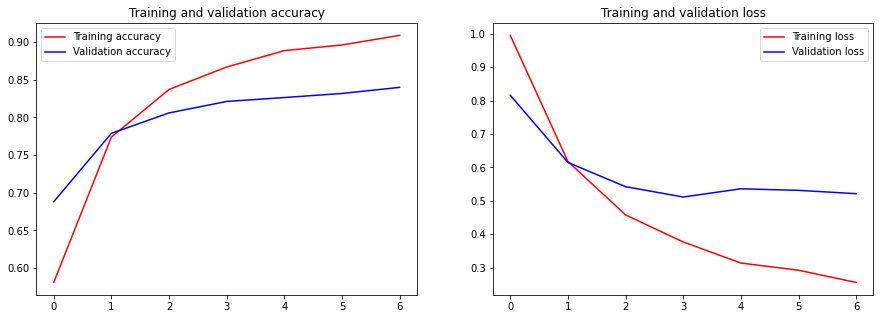

In [63]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)


ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend(loc=0)


plt.show()